## Face Detection with the use of MTCNN

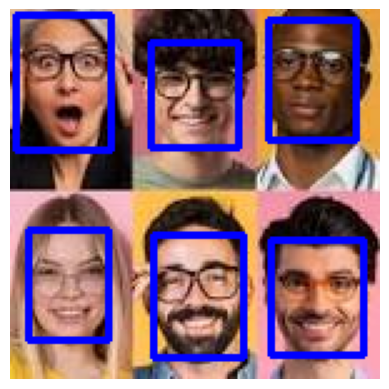

In [1]:
from facenet_pytorch import MTCNN
import cv2
import matplotlib.pyplot as plt

mtcnn = MTCNN()

def detect_faces_with_facenet(image_path):
    # Loading the image
    image = cv2.imread(image_path)

    # Convert the image to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detecting the faces
    boxes, _ = mtcnn.detect(rgb_image)

    # Drawing rectangles around the faces
    for box in boxes:
        x, y, w, h = [int(v) for v in box]
        cv2.rectangle(image, (x, y), (w, h), (255, 0, 0), 2)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


image_path = r'C:\Users\HP\Downloads\grp Img3.jpeg'

detect_faces_with_facenet(image_path)


## Image Capturing for Personalized dataset

Enter the person's name (or type 'exit' to stop): Nakul
Capturing 25 photos of Nakul...


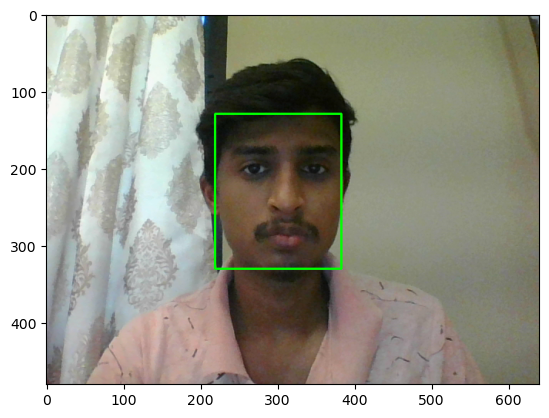

Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_1.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_2.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_3.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_4.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_5.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_6.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_7.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_8.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_9.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_10.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_11.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_12.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal_photos\Nakul\Nakul_13.jpg
Photo saved: C:\Users\HP\Downloads\LFW\personal

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import time

# Base directory to save images
base_save_dir = r'C:\Users\HP\Downloads\LFW\personal_photos'  # Update this path as needed

# Create the base directory if it doesn't exist
if not os.path.exists(base_save_dir):
    os.makedirs(base_save_dir)

# Initialize the MTCNN face detector
mtcnn = MTCNN(keep_all=True)

# Open the webcam for video capture (0 is the default webcam)
video_capture = cv2.VideoCapture(0)

if not video_capture.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Set up the matplotlib plot
plt.ion()  # Enable interactive mode
fig, ax = plt.subplots()
img_plot = None  # Placeholder for the plot that will be updated
capture_interval = 2  # Time interval (in seconds) between captures

# Main loop for capturing images of different people
while True:
    person_name = input("Enter the person's name (or type 'exit' to stop): ").strip()
    if person_name.lower() == 'exit':
        break

    # Create a directory for this person's photos
    person_dir = os.path.join(base_save_dir, person_name)
    if not os.path.exists(person_dir):
        os.makedirs(person_dir)

    count = 0  # Initialize the count of photos taken for this person
    num_photos = 25 # Set the number of photos to take for each person

    print(f"Capturing {num_photos} photos of {person_name}...")

    while count < num_photos:
        # Read a frame from the webcam
        ret, frame = video_capture.read()

        if not ret:
            print("Error: Could not read from webcam.")
            break

        # Detect faces in the frame
        boxes, _ = mtcnn.detect(frame)

        # Draw bounding boxes around detected faces
        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Update or create the plot
        if img_plot is None:
            img_plot = ax.imshow(frame_rgb)  # Initial plot
        else:
            img_plot.set_data(frame_rgb)  # Update the plot with the new frame

        # Pause for a brief moment to allow the plot to update
        plt.pause(0.001)

        # Automatically capture image every `capture_interval` seconds
        time.sleep(capture_interval)  # Wait for the specified interval
        # Create a filename for the image
        photo_filename = os.path.join(person_dir, f'{person_name}_{count + 1}.jpg')
        cv2.imwrite(photo_filename, frame)  # Save the captured frame
        print(f"Photo saved: {photo_filename}")
        count += 1  # Increment the count

    print(f"Completed capturing {num_photos} photos of {person_name}.\n")

# Release the webcam and close all matplotlib windows
video_capture.release()
plt.ioff()  # Disable interactive mode
plt.close()

print("Done capturing photos.")


## Data Augmentation on Collected Dataset

In [6]:
# Define augmentations
from PIL import Image  # Import Image from PIL
import torchvision.transforms as transforms  # Import transforms from torchvision
import os

def augment_image(image_path):
    # Load image
    image = Image.open(image_path)
    
    # Define transformations
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),          # Random horizontal flip
        transforms.RandomRotation(degrees=15),           # Random rotation up to 15 degrees
        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Random brightness and contrast changes
        transforms.RandomResizedCrop(size=image.size, scale=(0.8, 1.2), ratio=(0.75, 1.33))  # Random crop and resize
    ])
    
    return transform(image)

# Function to save augmented images
def save_augmented_images(input_dir, output_dir, num_augments=5):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for person_name in os.listdir(input_dir):
        person_dir = os.path.join(input_dir, person_name)
        augmented_person_dir = os.path.join(output_dir, person_name)
        if not os.path.exists(augmented_person_dir):
            os.makedirs(augmented_person_dir)

        for image_file in os.listdir(person_dir):
            image_path = os.path.join(person_dir, image_file)
            for i in range(num_augments):
                augmented_image = augment_image(image_path)
                augmented_image_filename = f"{image_file.split('.')[0]}_aug_{i + 1}.jpg"
                augmented_image.save(os.path.join(augmented_person_dir, augmented_image_filename))
                print(f"Saved augmented image: {augmented_image_filename}")

# Paths
input_dir = r'C:\Users\HP\Downloads\LFW\personal_photos'  # Original dataset
output_dir = r'C:\Users\HP\Downloads\LFW\augmented_photos'  # Augmented dataset

# Perform augmentations
save_augmented_images(input_dir, output_dir, num_augments=5)


Saved augmented image: Nakul_1_aug_1.jpg
Saved augmented image: Nakul_1_aug_2.jpg
Saved augmented image: Nakul_1_aug_3.jpg
Saved augmented image: Nakul_1_aug_4.jpg
Saved augmented image: Nakul_1_aug_5.jpg
Saved augmented image: Nakul_10_aug_1.jpg
Saved augmented image: Nakul_10_aug_2.jpg
Saved augmented image: Nakul_10_aug_3.jpg
Saved augmented image: Nakul_10_aug_4.jpg
Saved augmented image: Nakul_10_aug_5.jpg
Saved augmented image: Nakul_11_aug_1.jpg
Saved augmented image: Nakul_11_aug_2.jpg
Saved augmented image: Nakul_11_aug_3.jpg
Saved augmented image: Nakul_11_aug_4.jpg
Saved augmented image: Nakul_11_aug_5.jpg
Saved augmented image: Nakul_12_aug_1.jpg
Saved augmented image: Nakul_12_aug_2.jpg
Saved augmented image: Nakul_12_aug_3.jpg
Saved augmented image: Nakul_12_aug_4.jpg
Saved augmented image: Nakul_12_aug_5.jpg
Saved augmented image: Nakul_13_aug_1.jpg
Saved augmented image: Nakul_13_aug_2.jpg
Saved augmented image: Nakul_13_aug_3.jpg
Saved augmented image: Nakul_13_aug_4.j

## Face Recognition on Augmented Dataset

In [8]:
# Required Libraries
import cv2
import numpy as np
import os
import torch
import torchvision.transforms as transforms
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Set up matplotlib for inline display
%matplotlib inline

# Initialize MTCNN for face detection
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=True, device=device)

# Initialize InceptionResnetV1 for face recognition
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Prepare your dataset path
dataset_path = r'C:\Users\HP\Downloads\LFW\personal_photos'  # Change this to your dataset path

# Image transformation for model input
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Function to encode images from the dataset
def encode_images_from_dataset(dataset_path):
    encodings = {}
    for person_folder in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_folder)
        if os.path.isdir(person_path):
            encodings[person_folder] = []
            for image_name in os.listdir(person_path):
                image_path = os.path.join(person_path, image_name)
                image = Image.open(image_path).convert('RGB')
                image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
                with torch.no_grad():
                    encoding = model(image_tensor).cpu().numpy().flatten()  # Flatten to 1D
                encodings[person_folder].append(encoding)

    # Average the encodings for each person
    for person in encodings:
        encodings[person] = np.mean(encodings[person], axis=0)

    return encodings

# Encode the dataset
encodings = encode_images_from_dataset(dataset_path)

# Function to recognize faces and detect landmarks in a frame
def recognize_faces_with_landmarks(frame, encodings):
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes, probs, landmarks = mtcnn.detect(img_rgb, landmarks=True)

    results = []
    if boxes is not None:
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = [int(b) for b in box]
            face = img_rgb[y1:y2, x1:x2]
            face_pil = Image.fromarray(face)
            face_tensor = transform(face_pil).unsqueeze(0).to(device)

            with torch.no_grad():
                encoding = model(face_tensor).cpu().numpy().flatten()

            best_match = None
            best_score = float('-inf')
            for person, person_encoding in encodings.items():
                score = np.dot(encoding, person_encoding) / (np.linalg.norm(encoding) * np.linalg.norm(person_encoding))
                if score > best_score:
                    best_match = person
                    best_score = score

            confidence_score = (best_score + 1) / 2  # Convert to [0, 1] range
            label = best_match if confidence_score > 0.6 else "Unknown"
            color = (0, 255, 0) if label != "Unknown" else (255, 0, 0)
            results.append((label, (x1, y1, x2, y2), confidence_score * 100, landmarks[i] if landmarks is not None else None))
    else:
        results.append(("Face Not Detected", None, 0, None))

    return results

# Start webcam capture and recognition loop
cap = cv2.VideoCapture(0)  # Change 0 to another index if you have multiple cameras
cap.set(cv2.CAP_PROP_FPS, 30)  # Set FPS (will depend on camera hardware)

plt.ion()  # Interactive mode on for dynamic updates
fig, ax = plt.subplots(figsize=(10, 8))

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        # Recognize faces in the frame with landmarks
        results = recognize_faces_with_landmarks(frame, encodings)

        # Draw bounding boxes, labels, and landmarks on the frame
        for result in results:
            label, bbox_coords, confidence, landmark_points = result
            
            # Set color based on label
            color = (255, 0, 0) if label == "Unknown" or label == "Face Not Detected" else (0, 255, 0)
            
            if bbox_coords is not None:
                x1, y1, x2, y2 = bbox_coords
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
                cv2.putText(frame, f"{label} : {confidence:.2f}%", (x1, y1 - 10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)
                
                # Draw landmarks
                if landmark_points is not None:
                    for point in landmark_points:
                        cv2.circle(frame, (int(point[0]), int(point[1])), 2, (0, 255, 255), -1)
            else:
                # Display "Face Not Detected" in the middle of the frame
                cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        # Convert the frame to RGB for displaying with matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Update plot with new frame
        ax.clear()
        ax.imshow(frame_rgb)
        ax.axis("off")
        display(fig)
        clear_output(wait=True)  # Clear previous output to update with new frame

except KeyboardInterrupt:
    print("Webcam stream stopped")

finally:
    cap.release()
    plt.close(fig)

Webcam stream stopped
